In [1]:
import warnings
warnings.filterwarnings('ignore')

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Lesson 4*
On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophiscated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifing common themes in customer reviews
* Discoverying the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* <a href="#p1">Part 1</a>: Describe how an LDA Model works
* <a href="#p2">Part 2</a>: Estimate a LDA Model with Gensim
* <a href="#p3">Part 3</a>: Interpret LDA results
* <a href="#p4">Part 4</a>: Select the appropriate number of topics

## Part 1: Latent Dirchilet Allocation (LDA) Models
<a id="#p1"></a>

LDA is a "generative probabilistic model". 

Let's play with a modoel available [here](https://lettier.com/projects/lda-topic-modeling/)

## Part 2: Estimating LDA Models with Gensim
<a id="#p1"></a>

### A Litterary Introduction: *Jane Austen V. Charlotte Bronte*
Despite being born nearly forty years apart, modern fans often pit Jane Austen & Charlotte Bronte against one another in a battle for litterary  supremacy. The battle centers around the topics of education for women, courting, and marriage. The authors' similiar backgrounds naturally draw comparisons, but the modern fascination is probably due to novelility of British women publishing novels during the early 19th century. 

Can we help close a litterary battle for supremacy and simply acknowledge that the authors addressed different topics and deserve to be acknowledged as excellent authors each in their own right?

We're going to apply Latent Dirichlet Allocation a machine learning alogrithm for topic modeling to each of the author's novels to compare the distribution of topics in their novels.

In [3]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

### Novel Data
I grabbed the novel data pre-split into a bunch of smaller chuncks

In [4]:
path = './data/austen-brontë-split'

### Text Preprocessing
**Challenge**: update the function `tokenize` with any technique you have learned so far this week. 

In [7]:
titles = [t[:-4] for t in os.listdir(path)]

In [8]:
titles[:5]

['Austen_Emma0026',
 'Austen_Emma0032',
 'CBronte_Villette0086',
 'CBronte_Jane0099',
 'CBronte_Villette0092']

In [9]:
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [10]:
tokenize("Hello World! This a test of the tokenization method")

['hello', 'world', 'test', 'tokenization', 'method']

### Author DataFrame


In [11]:
df = pd.DataFrame(index=titles)

In [12]:
df.head()

Empty DataFrame
Columns: []
Index: [Austen_Emma0026, Austen_Emma0032, CBronte_Villette0086, CBronte_Jane0099, CBronte_Villette0092]

In [13]:
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()
df['book'] = df.reset_index()['index'].apply(lambda x: x.split('_')[1][:-4]).tolist()
df['section'] = df.reset_index()['index'].apply(lambda x: x[-4:]).tolist()
df['section'] = df['section'].astype('int')

In [14]:
df['author'] = df['author'].map({'Austen':1, 'CBronte':0})

In [15]:
df.author.value_counts()

0    441
1    372
Name: author, dtype: int64

### Streaming Documents
Here we use a new pythonic thingy: the `yield` statement in our fucntion. This allows us to iterate over a bunch of documents without actually reading them into memory. You can see how we use this fucntion later on. 

In [16]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            tokens = tokenize(str(text))
            yield tokens

### Gensim LDA Topic Modeling

In [28]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(doc_stream(path))

In [29]:
id2word.doc2bow(tokenize("This is a sample message Darcy England England England"))

[(869, 3), (1254, 1), (2485, 1), (16851, 1)]

In [32]:
import sys
sys.getsizeof(id2word)

56

In [33]:
len(id2word.keys())

22096

In [41]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=10, no_above=0.75)

In [42]:
len(id2word.keys())

4922

In [43]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [id2word.doc2bow(text) for text in doc_stream(path)]

In [47]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_apply',
 '_load_specials',
 '_save_specials',
 '_smart_save',
 'alpha',
 'batch',
 'bound',
 'callbacks',
 'chunksize',
 'clear',
 'decay',
 'diff',
 'dispatcher',
 'distributed',
 'do_estep',
 'do_mstep',
 'dtype',
 'eta',
 'eval_every',
 'expElogbeta',
 'gamma_threshold',
 'get_document_topics',
 'get_term_topics',
 'get_topic_terms',
 'get_topics',
 'id2word',
 'inference',
 'init_dir_prior',
 'iterations',
 'load',
 'log_perplexity',
 'minimum_phi_value',
 'minimum_probability',
 'num_terms',
 'num_topics',
 'num_updates',
 'numworkers',
 'offset',
 'optimize_al

[(0,
  '0.025*"marianne" + 0.022*"elinor" + 0.013*"willoughby" + 0.008*"sister" + 0.006*"jennings" + 0.006*"mother" + 0.006*"heart" + 0.005*"moment" + 0.005*"mind" + 0.005*"long"'),
 (1,
  '0.020*"miss" + 0.016*"reed" + 0.016*"bessie" + 0.015*"jane" + 0.010*"sir" + 0.009*"helen" + 0.007*"like" + 0.006*"yes" + 0.006*"shall" + 0.006*"think"'),
 (2,
  '0.020*"marianne" + 0.016*"elinor" + 0.013*"dashwood" + 0.010*"john" + 0.009*"mother" + 0.009*"edward" + 0.009*"house" + 0.006*"sir" + 0.006*"willoughby" + 0.006*"middleton"'),
 (3,
  '0.021*"emma" + 0.014*"miss" + 0.013*"harriet" + 0.011*"weston" + 0.010*"elton" + 0.010*"knightley" + 0.009*"thing" + 0.008*"think" + 0.008*"woodhouse" + 0.007*"know"'),
 (4,
  '0.009*"night" + 0.007*"bretton" + 0.007*"like" + 0.007*"saw" + 0.006*"long" + 0.005*"thought" + 0.004*"white" + 0.004*"dr" + 0.004*"light" + 0.004*"know"'),
 (5,
  '0.019*"elizabeth" + 0.019*"collins" + 0.014*"charlotte" + 0.011*"lucas" + 0.010*"jane" + 0.009*"bennet" + 0.007*"miss" + 0

In [50]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [56]:
topics = [' '.join(t[0:5]) for t in words]

In [58]:
print(topics[0])

marianne elinor willoughby sister jennings


## Part 3: Interpret LDA Results
<a id="#p3"></a>

### Topic Distance Visualization

In [59]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [60]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.058604 -0.031027       1        1  34.734291
10    -0.120414  0.005641       2        1  20.653645
3     -0.101455  0.039177       3        1  14.296442
14     0.026689  0.026194       4        1   5.501760
6      0.109678  0.052501       5        1   3.971564
0     -0.110039 -0.067810       6        1   3.434617
2     -0.134556 -0.075086       7        1   3.411018
13    -0.094378  0.013742       8        1   2.994605
9      0.109956 -0.027633       9        1   2.879944
4      0.136927 -0.074024      10        1   2.567989
1      0.060366  0.109874      11        1   1.894868
5     -0.120878  0.037211      12        1   1.239296
8      0.041421  0.032547      13        1   1.067629
12     0.041714  0.047221      14        1   0.730943
11     0.096367 -0.088529      15        1   0.621385, topic_info=     Category         Freq       Term        Total  loglift  logprob
992   Default  1536.000000       miss  1536.000000  30.0000  30.0000
1426  Default   612.000000  elizabeth   612.000000  29.0000  29.0000
77    Default   894.000000       emma   894.000000  28.0000  28.0000
2275  Default   678.000000     elinor   678.000000  27.0000  27.0000
2294  Default   568.000000   marianne   568.000000  26.0000  26.0000
745   Default   942.000000       jane   942.000000  25.0000  25.0000
377   Default  1337.000000       like  1337.000000  24.0000  24.0000
452   Default  1317.000000      think  1317.000000  23.0000  23.0000
568   Default   403.000000     madame   403.000000  22.0000  22.0000
120   Default   541.000000    harriet   541.000000  21.0000  21.0000
151   Default  1435.000000       know  1435.000000  20.0000  20.0000
71    Default   539.000000       door   539.000000  19.0000  19.0000
1052  Default   607.000000        sir   607.000000  18.0000  18.0000
1807  Default   393.000000      darcy   393.000000  17.0000  17.0000
1399  Default   304.000000     bennet   304.000000  16.0000  16.0000
465   Default   455.000000     weston   455.000000  15.0000  15.0000
221   Default   891.000000       room   891.000000  14.0000  14.0000
607   Default   928.000000      shall   928.000000  13.0000  13.0000
230   Default   574.000000     sister   574.000000  12.0000  12.0000
1792  Default   283.000000    bingley   283.000000  11.0000  11.0000
321   Default  1062.000000        day  1062.000000  10.0000  10.0000
802   Default   371.000000  rochester   371.000000   9.0000   9.0000
132   Default   760.000000      house   760.000000   8.0000   8.0000
380   Default   910.000000        man   910.000000   7.0000   7.0000
146   Default   630.000000       john   630.000000   6.0000   6.0000
392   Default   627.000000      night   627.000000   5.0000   5.0000
76    Default   399.000000      elton   399.000000   4.0000   4.0000
375   Default   615.000000       lady   615.000000   3.0000   3.0000
1405  Default   169.000000    collins   169.000000   2.0000   2.0000
160   Default   941.000000       long   941.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
1249  Topic15     4.259648      bread    73.464836   2.2334  -6.0364
1250  Topic15     6.214193  breakfast   142.784592   1.9465  -5.6587
1378  Topic15     9.992114     turned   335.298279   1.5678  -5.1837
431   Topic15     5.960161       seat   142.591202   1.9061  -5.7004
567   Topic15     9.784149       lucy   369.863464   1.4486  -5.2048
794   Topic15     4.493963        red    88.652267   2.0990  -5.9828
3615  Topic15     3.058527        bid    43.642807   2.4229  -6.3676
128   Topic15    10.799887       home   495.824097   1.2543  -5.1060
4718  Topic15     5.116044     bessie   125.059433   1.8846  -5.8532
122   Topic15     9.809717     having   540.337646   1.0722  -5.2022
748   Topic15     9.101069       knew   550.302002   0.9789  -5.2771
1719  Topic15     5.597059       paul   184.613068   1.5850  -5.7633
380

### Overall Model / Documents

In [62]:
lda[corpus[0]]

[(3, 0.40677), (7, 0.14902128), (10, 0.44191644)]

In [63]:
distro = [lda[d] for d in corpus]

In [64]:
distro[0]

[(3, 0.40677533), (7, 0.1490287), (10, 0.44190374)]

In [69]:
def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [67]:
d_dist = {k:0 for k in range(0,15)}

In [68]:
d_dist

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0}

In [72]:
df = pd.DataFrame.from_records(new_distro, index=titles)
df.columns = topics
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()

In [73]:
df.head()

marianne elinor willoughby sister jennings  \
Austen_Emma0026                                              0.0   
Austen_Emma0032                                              0.0   
CBronte_Villette0086                                         0.0   
CBronte_Jane0099                                             0.0   
CBronte_Villette0092                                         0.0   

                      miss reed bessie jane sir  \
Austen_Emma0026                             0.0   
Austen_Emma0032                             0.0   
CBronte_Villette0086                        0.0   
CBronte_Jane0099                            0.0   
CBronte_Villette0092                        0.0   

                      marianne elinor dashwood john mother  \
Austen_Emma0026                                        0.0   
Austen_Emma0032                                        0.0   
CBronte_Villette0086                                   0.0   
CBronte_Jane0099                                       0.0   
CBronte_Villette0092                                   0.0   

                      emma miss harriet weston elton  \
Austen_Emma0026                             0.406775   
Austen_Emma0032                             0.788514   
CBronte_Villette0086                        0.000000   
CBronte_Jane0099                            0.000000   
CBronte_Villette0092                        0.028774   

                      night bretton like saw long  \
Austen_Emma0026                          0.000000   
Austen_Emma0032                          0.000000   
CBronte_Villette0086                     0.000000   
CBronte_Jane0099                         0.997287   
CBronte_Villette0092                     0.000000   

                      elizabeth collins charlotte lucas jane  \
Austen_Emma0026                                          0.0   
Austen_Emma0032                                          0.0   
CBronte_Villette0086                                     0.0   
CBronte_Jane0099                                         0.0   
CBronte_Villette0092                                     0.0   

                      rochester jane door sir room  \
Austen_Emma0026                                0.0   
Austen_Emma0032                                0.0   
CBronte_Villette0086                           0.0   
CBronte_Jane0099                               0.0   
CBronte_Villette0092                           0.0   

                      like thought day know long  \
Austen_Emma0026                         0.149029   
Austen_Emma0032                         0.038802   
CBronte_Villette0086                    0.673504   
CBronte_Jane0099                        0.000000   
CBronte_Villette0092                    0.917771   

                      miss ingram eshton temple lady  \
Austen_Emma0026                                  0.0   
Austen_Emma0032                                  0.0   
CBronte_Villette0086                             0.0   
CBronte_Jane0099                                 0.0   
CBronte_Villette0092                             0.0   

                      madame door like room graham  \
Austen_Emma0026                           0.000000   
Austen_Emma0032                           0.000000   
CBronte_Villette0086                      0.000000   
CBronte_Jane0099                          0.000000   
CBronte_Villette0092                      0.051475   

                      elizabeth miss know sister think  \
Austen_Emma0026                               0.441904   
Austen_Emma0032                               0.170351   
CBronte_Villette0086                          0.000000   
CBronte_Jane0099                              0.000000   
CBronte_Villette0092                          0.000000   

                      papa graham home like man  \
Austen_Emma0026                             0.0   
Austen_Emma0032                             0.0   
CBronte_Villette0086                        0.0   
CBronte_Jane0099                       

In [74]:
df.groupby('author').mean()

marianne elinor willoughby sister jennings  \
author                                                
Austen                                     0.070843   
CBronte                                    0.000654   

         miss reed bessie jane sir  marianne elinor dashwood john mother  \
author                                                                     
Austen                    0.000342                              0.069807   
CBronte                   0.036233                              0.000536   

         emma miss harriet weston elton  night bretton like saw long  \
author                                                                 
Austen                         0.303502                     0.000222   
CBronte                        0.002200                     0.045220   

         elizabeth collins charlotte lucas jane  rochester jane door sir room  \
author                                                                          
Austen                                 0.026562                      0.002335   
CBronte                                0.000000                      0.073837   

         like thought day know long  miss ingram eshton temple lady  \
author                                                                
Austen                     0.011799                        0.000283   
CBronte                    0.619881                        0.019861   

         madame door like room graham  elizabeth miss know sister think  \
author                                                                    
Austen                       0.000843                          0.445328   
CBronte                      0.049955                          0.016087   

         papa graham home like man  bessie door fairfax shall know  \
author                                                               
Austen                    0.000000                        0.001635   
CBronte                   0.010788                        0.012215   

         bingley miss darcy elizabeth bennet  know sir think jane rochester  
author                                                                       
Austen                              0.060403                       0.003339  
CBronte                             0.005559                       0.104051

## Can we see if one of the authors focus more on men than women? - Ned

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow


## Part 4: Selecting the Number of Topics
<a id="#p4"></a>

In [75]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = doc_stream(path)
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [76]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator))

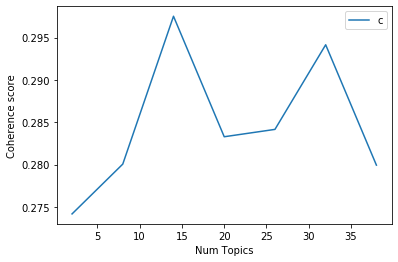

In [79]:
# Show graph
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [80]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2742
Num Topics = 8  has Coherence Value of 0.2801
Num Topics = 14  has Coherence Value of 0.2975
Num Topics = 20  has Coherence Value of 0.2833
Num Topics = 26  has Coherence Value of 0.2842
Num Topics = 32  has Coherence Value of 0.2941
Num Topics = 38  has Coherence Value of 0.2799


In [81]:
import spacy

nlp = spacy.load('en_core_web_lg')

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/neural/train.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, SGD, linear_decay
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import defaultdict, Sequence, Sized, Iterable, Callable
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import defaultdict, Sequence, Sized, Iterable, Callable


In [83]:
test = "Ned ask me a question about England today."

In [84]:
doc = nlp(test)

for token in doc:
    print(token.text, token.lemma_, token.pos_)

Ned ned PROPN
ask ask VERB
me -PRON- PRON
a a DET
question question NOUN
about about ADP
England england PROPN
today today NOUN
. . PUNCT


In [85]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Ned PERSON
England GPE
today DATE


In [88]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            yield text

def get_people(docstream):
    
    ppl = []
    in
    for d in docstream:
        
        doc = nlp(d)
        
        for ent in doc.ents:
            
            if ent.label_ == "PERSON":
                ppl.append(ent.text)
                
    return set(ppl)

In [89]:
people = get_people(doc_stream(path))

In [92]:
people = pd.Series(list(people))

In [94]:
people.head(50)

0                     Prudence
1           another Lucy Snowe
2                 Lydia Bennet
3                       J.E.\n
4                   Lucy Snowe
5                      \nJesus
6              Stilton\ncheese
7                  William Cox
8                       Paynim
9                    Bon\nsoir
10                       Ruben
11                    St. Matt
12                  Will Polly
13            Lady Middleton's
14               Bill Oliver's
15                    Robert\n
16                        Chut
17                   M. Paul's
18                Sarah Martha
19                      Trista
20            Ginevra Fanshawe
21                    Ferndean
22                   \nFanny's
23                   Scotchman
24                  \nEnscombe
25      John\nKnightley)--your
26       Cette malle est a moi
27                Brocklehurst
28                        Kint
29               \nGeorgette's
30                    M. Brown
31                \ndeceit!--I
32      

## Additional Resources
## Resources

* [Gensim](https://radimrehurek.com/gensim/): Python package for topic modeling, nlp, word vectorization, and few other things. Well maintained and well documented.
* [Topic Modeling with Gensim](http://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling): A kind of cookbook for LDA with gensim. Excellent overview, but the you need to be aware of missing import statements and assumed prior knowledge.
* [Chinese Restuarant Process](https://en.wikipedia.org/wiki/Chinese_restaurant_process): That really obscure stats thing I mentioned... 
* [PyLDAvis](https://github.com/bmabey/pyLDAvis): Library for visualizing the topic model and performing some exploratory work. Works well. Has a direct parrell implementation in R as well. 
* [Rare Technologies](https://rare-technologies.com/): The people that made & maintain gensim and a few other libraries.
* [Jane Austen v. Charlotte Bronte](https://www.literaryladiesguide.com/literary-musings/jane-austen-charlotte-bronte-different-alike/)